In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_json('../data/database-27-10.json')

In [9]:
authors = df.groupby(['author']).size().reset_index(name="amount").sort_values("amount", ascending=False)

In [10]:
authors.head(10)

In [14]:
# Filter nach den Artikeln eines Autors
df = df.loc[(df['author'] == 'Kai Küstner')]

In [15]:
# Lösche time von datetime
df['date'] = df['date'].dt.normalize()

In [16]:
# Zähle die Artikel
df = df.groupby(['date', 'author']).size().reset_index(name="amount").sort_values("amount")

In [17]:
# Bestimme den Startpunkt (Datum des ersten Artikel) bis zum Endpunkt (Datum des letzten Artikels)
min = df['date'].min()
max = df['date'].max()

In [18]:
mapping = dict(zip(df['date'], df['amount']))

In [19]:
df = pd.DataFrame({'date': pd.date_range(min, max, freq='D')})

ValueError: Neither `start` nor `end` can be NaT

In [ ]:
df = df.assign(amount=df['date'].map(mapping))
df = df.fillna(0)

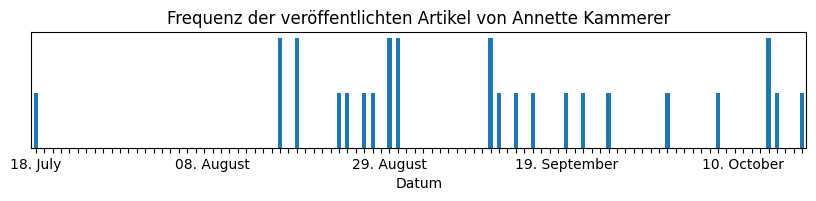

In [25]:

ax = df.plot(kind="bar", x="date", y="amount", figsize=(10,1.5), legend=False, rot=0)

ax.set_title("Frequenz der veröffentlichten Artikel von Annette Kammerer")

ax.set_xticklabels(df['date'].dt.strftime('%d. %B'))

ax.set_xlabel("Datum")

for i, t in enumerate(ax.get_xticklabels()):
    if (i % 21) != 0:
        t.set_visible(False)

y_axis = ax.axes.get_yaxis()
y_axis.set_visible(False)